<a href="https://colab.research.google.com/github/PraeJi/Image_Captioning/blob/main/image_captioning_hack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

image_processing_thai_language_image_captioning_path = kagglehub.competition_download('image-processing-thai-language-image-captioning')
awsaf49_coco_2017_dataset_path = kagglehub.dataset_download('awsaf49/coco-2017-dataset')

print('Data source import complete.')


In [ ]:
import json
import pandas as pd
import ast
from PIL import Image
import os
from tqdm import tqdm

In [ ]:
with open("/kaggle/input/image-processing-thai-language-image-captioning/capgen_v1.0_train.json","r") as file:
    data_train = json.load(file)

with open("/kaggle/input/image-processing-thai-language-image-captioning/capgen_v1.0_val.json","r") as file:
    data_val = json.load(file)

In [ ]:
records_train = []
for img_paths, captions in data_train.items():
    for idx, cap in enumerate(captions):
        records_train.append((img_paths,idx,cap))

df_train = pd.DataFrame(records_train,columns=["img_paths","caption_idx","captions"])
df_train['img_id'] = df_train['img_paths'].apply(lambda x: x.split("/")[-1])
df_train['from'] = df_train['img_paths'].apply(lambda x: x.split("/")[0])

In [ ]:
df_train

,img_paths,caption_idx,captions,img_id,from
0,coco/train2017/000000373716.jpg,0,ผู้หญิงสวมเสื้อแขนยาวสีขาวและเด็กนั่งเล่นกับสุ...,000000373716.jpg,coco
1,coco/train2017/000000373716.jpg,1,สาวคนนึงกำลังพาเด็กมานั่งเล่นอยู่ภายในสนามหญ้า...,000000373716.jpg,coco
2,coco/train2017/000000373716.jpg,2,ภาพขาวดำ ผู้หญิงนั่งบนพื้นอุ้มเด็กบนตัก ข้าง ๆ...,000000373716.jpg,coco
3,coco/train2017/000000196888.jpg,0,สีน้ำตาลตัวเล็กกำลังกินอาหารอยู่บนจานกระดาษสีข...,000000196888.jpg,coco
4,coco/train2017/000000196888.jpg,1,นกน้อยตัวหนึ่งกำลังจิกกินเศษอาหารที่วางทิ้งไว้...,000000196888.jpg,coco
...,...,...,...,...,...
430280,ipu24/train/food/28002.jpg,1,ขนมสับปะรดที่ใส่หมูสับใส่ในจานสีขาวและมีผักสวน...,28002.jpg,ipu24
430281,ipu24/train/food/28002.jpg,2,ในจานสีขาวมีสับปะรดหั่นเป็นชิ้นสามเหลี่ยมเล็ก ...,28002.jpg,ipu24
430282,ipu24/train/food/28003.jpg,0,ปลาดุกย่างเสียบไม้หลายตัวตั้งอยู่ในถาดมีผักแช่...,28003.jpg,ipu24
430283,ipu24/train/food/28003.jpg,1,ปลาดุกปิ้งจำนวนมากที่วางอยู่ในถาดอะลูมิเนียมทร...,28003.jpg,ipu24


In [ ]:
records_val = []
for img_paths, captions in data_val.items():
    for idx, cap in enumerate(captions):
        records_val.append((img_paths,idx,cap))

df_val = pd.DataFrame(records_val,columns=["img_paths","caption_idx","captions"])
df_val['img_id'] = df_val['img_paths'].apply(lambda x: x.split("/")[-1])
df_val['from'] = df_val['img_paths'].apply(lambda x: x.split("/")[0])

In [ ]:
df_val

,img_paths,caption_idx,captions,img_id,from
0,coco/val2017/000000060102.jpg,0,นักกีฬาฟุตบอลใส่เสื้อสีดำกำลังแย่งฟุตบอลอยู่กั...,000000060102.jpg,coco
1,coco/val2017/000000060102.jpg,1,ผู้ชายใส่เสื้อสีฟ้าและผู้ชายใส่เสื้อสีดำ เล่นฟ...,000000060102.jpg,coco
2,coco/val2017/000000060102.jpg,2,ผู้ชายใส่เสื้อสีน้ำเงินยืนอยู่ 1คน ด้านหน้ามีผ...,000000060102.jpg,coco
3,ipu24/val/travel/00000.jpg,0,รูปปั้นฤาษีสีทองนั่งอยู่ในท่าขัดสมาธิอยู่ภายใน...,00000.jpg,ipu24
4,ipu24/val/travel/00000.jpg,1,รูปปั้นฤาษีที่ตั้งอยู่บนโต๊ะบูชาอยู่ภายในศาลาว...,00000.jpg,ipu24
...,...,...,...,...,...
27453,coco/val2017/000000018837.jpg,1,รถบรรทุกสีเขียวจอดอยู่ตรงบริเวณที่จอดรถและมีคน...,000000018837.jpg,coco
27454,coco/val2017/000000018837.jpg,2,รถบรรทุกสีเขียวอยู่ริมถนนมีคนอยู่ข้างรถหนึ่งคน...,000000018837.jpg,coco
27455,coco/val2017/000000266768.jpg,0,กลุ่มคนกำลังนั่งรับประทานอาหารกันอยู่บนโต๊ะด้า...,000000266768.jpg,coco
27456,coco/val2017/000000266768.jpg,1,ผู้คนจำนวนหนึ่งที่กำลังนั่งคุยกันอยู่ที่โต๊ะไม...,000000266768.jpg,coco


## Explore dataset

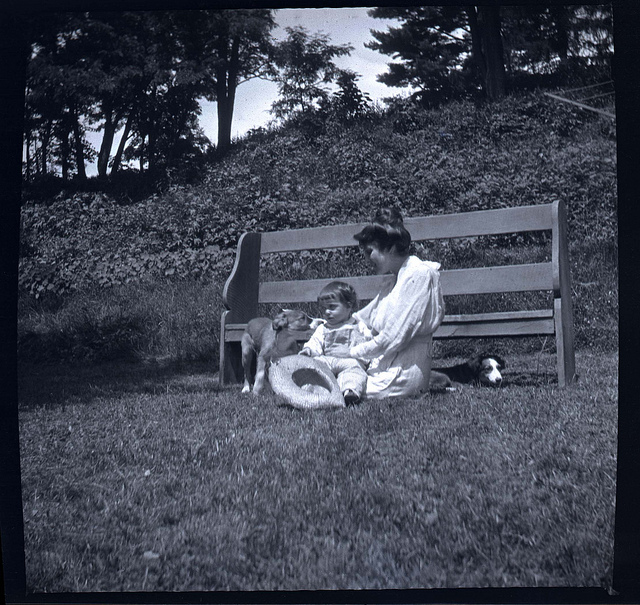

In [ ]:
Image.open(f"/kaggle/input/coco-2017-dataset/coco2017/train2017/{df_train['img_id'][0]}")

In [ ]:
df_train['captions'][0]

'ผู้หญิงสวมเสื้อแขนยาวสีขาวและเด็กนั่งเล่นกับสุนัขอยู่ ในสวนหย่อม'

In [ ]:
df_train['captions'][1]

'สาวคนนึงกำลังพาเด็กมานั่งเล่นอยู่ภายในสนามหญ้าพร้อมกับสุนัข'

In [ ]:
df_train['captions'][2]

'ภาพขาวดำ ผู้หญิงนั่งบนพื้นอุ้มเด็กบนตัก ข้าง ๆ มีหมาสองตัว ด้านหลังมีม้านั่งไม้'

In [ ]:
df_train['from'].value_counts()

from
coco     345044
ipu24     85241
Name: count, dtype: int64

In [ ]:
df_val['from'].value_counts()

from
coco     15172
ipu24    12286
Name: count, dtype: int64

In [ ]:
def image_path(row):
    if row['from'] == 'coco':
        image_path = os.path.join("/kaggle/input/coco-2017-dataset/coco2017/train2017", row['img_id'])
    if row['from'] == 'ipu24':
        if 'food' in row['img_paths']:
            image_path = os.path.join("/kaggle/input/image-processing-thai-language-image-captioning/train/train/food", row['img_id'])
        elif 'travel' in row['img_paths']:
            image_path = os.path.join("/kaggle/input/image-processing-thai-language-image-captioning/train/train/travel", row['img_id'])

    return image_path

In [ ]:
def load_images_with_progress(df, batch_size=100):
    all_batches = []  # List to store all processed batches

    # Create a progress bar for the entire dataset
    with tqdm(total=len(df), desc="Loading Images", unit="image") as pbar:
        for start in range(0, len(df), batch_size):
            batch = df.iloc[start:start + batch_size].copy()  # Create a copy of the batch to avoid SettingWithCopyWarning
            batch.loc[:, "new_image_path"] = batch.apply(image_path, axis=1)  # Load images for the batch
            all_batches.append(batch)  # Append the batch to the list

            # Update the progress bar after each batch
            pbar.update(batch_size)

    # Concatenate all batches back into a single dataframe
    df = pd.concat(all_batches, ignore_index=True)
    return df

In [ ]:
dataset_train = load_images_with_progress(df_train, batch_size = 100)

Loading Images: 430300image [00:08, 49086.90image/s]                         


In [ ]:
dataset_train

,img_paths,caption_idx,captions,img_id,from,new_image_path
0,coco/train2017/000000373716.jpg,0,ผู้หญิงสวมเสื้อแขนยาวสีขาวและเด็กนั่งเล่นกับสุ...,000000373716.jpg,coco,/kaggle/input/coco-2017-dataset/coco2017/train...
1,coco/train2017/000000373716.jpg,1,สาวคนนึงกำลังพาเด็กมานั่งเล่นอยู่ภายในสนามหญ้า...,000000373716.jpg,coco,/kaggle/input/coco-2017-dataset/coco2017/train...
2,coco/train2017/000000373716.jpg,2,ภาพขาวดำ ผู้หญิงนั่งบนพื้นอุ้มเด็กบนตัก ข้าง ๆ...,000000373716.jpg,coco,/kaggle/input/coco-2017-dataset/coco2017/train...
3,coco/train2017/000000196888.jpg,0,สีน้ำตาลตัวเล็กกำลังกินอาหารอยู่บนจานกระดาษสีข...,000000196888.jpg,coco,/kaggle/input/coco-2017-dataset/coco2017/train...
4,coco/train2017/000000196888.jpg,1,นกน้อยตัวหนึ่งกำลังจิกกินเศษอาหารที่วางทิ้งไว้...,000000196888.jpg,coco,/kaggle/input/coco-2017-dataset/coco2017/train...
...,...,...,...,...,...,...
430280,ipu24/train/food/28002.jpg,1,ขนมสับปะรดที่ใส่หมูสับใส่ในจานสีขาวและมีผักสวน...,28002.jpg,ipu24,/kaggle/input/image-processing-thai-language-i...
430281,ipu24/train/food/28002.jpg,2,ในจานสีขาวมีสับปะรดหั่นเป็นชิ้นสามเหลี่ยมเล็ก ...,28002.jpg,ipu24,/kaggle/input/image-processing-thai-language-i...
430282,ipu24/train/food/28003.jpg,0,ปลาดุกย่างเสียบไม้หลายตัวตั้งอยู่ในถาดมีผักแช่...,28003.jpg,ipu24,/kaggle/input/image-processing-thai-language-i...
430283,ipu24/train/food/28003.jpg,1,ปลาดุกปิ้งจำนวนมากที่วางอยู่ในถาดอะลูมิเนียมทร...,28003.jpg,ipu24,/kaggle/input/image-processing-thai-language-i...


In [ ]:
dataset_train = dataset_train.drop(['img_paths','caption_idx', 'from', 'img_id',], axis=1)
dataset_train

,captions,new_image_path
0,ผู้หญิงสวมเสื้อแขนยาวสีขาวและเด็กนั่งเล่นกับสุ...,/kaggle/input/coco-2017-dataset/coco2017/train...
1,สาวคนนึงกำลังพาเด็กมานั่งเล่นอยู่ภายในสนามหญ้า...,/kaggle/input/coco-2017-dataset/coco2017/train...
2,ภาพขาวดำ ผู้หญิงนั่งบนพื้นอุ้มเด็กบนตัก ข้าง ๆ...,/kaggle/input/coco-2017-dataset/coco2017/train...
3,สีน้ำตาลตัวเล็กกำลังกินอาหารอยู่บนจานกระดาษสีข...,/kaggle/input/coco-2017-dataset/coco2017/train...
4,นกน้อยตัวหนึ่งกำลังจิกกินเศษอาหารที่วางทิ้งไว้...,/kaggle/input/coco-2017-dataset/coco2017/train...
...,...,...
430280,ขนมสับปะรดที่ใส่หมูสับใส่ในจานสีขาวและมีผักสวน...,/kaggle/input/image-processing-thai-language-i...
430281,ในจานสีขาวมีสับปะรดหั่นเป็นชิ้นสามเหลี่ยมเล็ก ...,/kaggle/input/image-processing-thai-language-i...
430282,ปลาดุกย่างเสียบไม้หลายตัวตั้งอยู่ในถาดมีผักแช่...,/kaggle/input/image-processing-thai-language-i...
430283,ปลาดุกปิ้งจำนวนมากที่วางอยู่ในถาดอะลูมิเนียมทร...,/kaggle/input/image-processing-thai-language-i...


In [ ]:
dataset_train['captions'][0]

'ผู้หญิงสวมเสื้อแขนยาวสีขาวและเด็กนั่งเล่นกับสุนัขอยู่ ในสวนหย่อม'

In [ ]:
dataset_train = dataset_train.sample(n=100000, random_state=42)

In [ ]:
dataset_train

,captions,new_image_path
383499,สนามหญ้าสีเขียว มีต้นไม้ปลูกอยู่ด้านข้างเสาไฟฟ...,/kaggle/input/image-processing-thai-language-i...
180638,ขบวนรถไฟเก่าจอดอยู่บนราง ข้างป่าสน มีสภาพเป็นส...,/kaggle/input/coco-2017-dataset/coco2017/train...
20035,ชายกับหญิงชราที่นั่งอยู่ตรงเก้าอี้ไม้และมีจักร...,/kaggle/input/coco-2017-dataset/coco2017/train...
297562,คนใส่เสื้อสีฟ้ากางเกงสีดำใส่หมวกสีดำเล่นสเกตบอ...,/kaggle/input/coco-2017-dataset/coco2017/train...
26283,ขนมปังหลายชิ้นที่อบกรอบมาแล้วที่มีซอสิอยู่ข้าง...,/kaggle/input/coco-2017-dataset/coco2017/train...
...,...,...
227202,รถบัสและรถยนต์อยู่บนถนนมีต้นไม้และอาคารอยู่ข้า...,/kaggle/input/coco-2017-dataset/coco2017/train...
358159,เจดีย์สีทองมีลายสีดำมีฐานของเจดีย์เป็นสีขาวอยู...,/kaggle/input/image-processing-thai-language-i...
40013,ผู้ชายใส่เสื้อสีขาวใส่หมวกสีดำถือไม้เบสบอลอยู่...,/kaggle/input/coco-2017-dataset/coco2017/train...
49546,ขนมปังอบสีน้ำตาลหั่นเป็นชิ้นหลายอันวางอยู่ในตะ...,/kaggle/input/coco-2017-dataset/coco2017/train...


# Install model

In [ ]:
!pip install unsloth
# Also get the latest nightly Unsloth!
!pip uninstall unsloth -y && pip install --upgrade --no-cache-dir --no-deps git+https://github.com/unslothai/unsloth.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 3.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 8.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.9/313.9 kB 7.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 MB 7.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 38.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 MB 18.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 5.2 MB/s eta 0:00:00
  Attempting u

In [ ]:
from unsloth import FastVisionModel # FastLanguageModel for LLMs
import torch

model, tokenizer = FastVisionModel.from_pretrained(
    # "scb10x/typhoon2-qwen2vl-7b-vision-instruct",
    "unsloth/Qwen2-VL-7B-Instruct-bnb-4bit",
    load_in_4bit = True, # Use 4bit to reduce memory use. False for 16bit LoRA.
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for long context
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.1.8: Fast Qwen2_Vl vision patching. Transformers: 4.48.2.
   \\   /|    GPU: Tesla T4. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.5.1+cu121. CUDA: 7.5. CUDA Toolkit: 12.1. Triton: 3.1.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.29.post1. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/6.36G [00:00<?, ?B/s]

`Qwen2VLRotaryEmbedding` can now be fully parameterized by passing the model config through the `config` argument. All other arguments will be removed in v4.46


generation_config.json:   0%|          | 0.00/238 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/567 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/4.30k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/392 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

In [ ]:
model = FastVisionModel.get_peft_model(
    model,
    finetune_vision_layers     = True, # False if not finetuning vision layers
    finetune_language_layers   = True, # False if not finetuning language layers
    finetune_attention_modules = True, # False if not finetuning attention layers
    finetune_mlp_modules       = True, # False if not finetuning MLP layers

    r = 16,           # The larger, the higher the accuracy, but might overfit
    lora_alpha = 16,  # Recommended alpha == r at least
    lora_dropout = 0,
    bias = "none",
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
    # target_modules = "all-linear", # Optional now! Can specify a list if needed
)

Unsloth: Making `model.base_model.model.visual` require gradients


In [ ]:
instruction = "คิดแคปชั่นรูปนี้ให้หน่อย"

In [ ]:
def convert_to_conversation(sample):
    conversation = [
        {
          "role": "user",
          "content" : [
            {"type" : "text",  "text"  : instruction},
            {"type" : "image", "image" : Image.open(sample["new_image_path"])} ]
        },
        {
          "role" : "assistant",
          "content" : [
            {"type" : "text",  "text"  : sample["captions"]} ]
        },
    ]
    return { "messages" : conversation }
pass

In [ ]:
converted_dataset = []
for i,row in tqdm(dataset_train.iterrows()):
    converted_dataset.append(convert_to_conversation(row))

100000it [18:25, 90.43it/s]


In [ ]:
converted_dataset[0]

{'messages': [{'role': 'user',
   'content': [{'type': 'text', 'text': 'คิดแคปชั่นรูปนี้ให้หน่อย'},
    {'type': 'image',
     'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x270>}]},
  {'role': 'assistant',
   'content': [{'type': 'text',
     'text': 'สนามหญ้าสีเขียว มีต้นไม้ปลูกอยู่ด้านข้างเสาไฟฟ้า และมีภูเขาด้านหลัง'}]}]}

In [ ]:
from unsloth import is_bf16_supported
from unsloth.trainer import UnslothVisionDataCollator
from trl import SFTTrainer, SFTConfig

FastVisionModel.for_training(model) # Enable for training!

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    data_collator = UnslothVisionDataCollator(model, tokenizer), # Must use!
    train_dataset = converted_dataset,
    args = SFTConfig(
        per_device_train_batch_size = 2,
        gradient_accumulation_steps = 4,
        warmup_steps = 5,
        max_steps = 10,
        # num_train_epochs = 1, # Set this instead of max_steps for full training runs
        learning_rate = 2e-4,
        fp16 = not is_bf16_supported(),
        bf16 = is_bf16_supported(),
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
        report_to = "none",     # For Weights and Biases

        # You MUST put the below items for vision finetuning:
        remove_unused_columns = False,
        dataset_text_field = "",
        dataset_kwargs = {"skip_prepare_dataset": True},
        dataset_num_proc = 4,
        max_seq_length = 2048,
    ),
)

In [ ]:
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs = 1
   \\   /|    Num examples = 100,000 | Num Epochs = 1
O^O/ \_/ \    Batch size per device = 2 | Gradient Accumulation steps = 4
\        /    Total batch size = 8 | Total steps = 10
 "-____-"     Number of trainable parameters = 50,855,936
🦥 Unsloth needs about 1-3 minutes to load everything - please wait!


Unsloth: Will smartly offload gradients to save VRAM!


Step,Training Loss
1,2.415000
2,2.604500
3,2.433400
4,2.587300
5,2.258400
6,2.302100
7,1.762700
8,1.528500
9,1.491300
10,1.324800


In [ ]:
FastVisionModel.for_inference(model)

instruction = "คิดแคปชั่นรูปนี้ให้หน่อย"
test_cap = []
def generateCaption(image_path):
    image = Image.open(image_path)
    messages = [
        {"role": "user", "content": [
            {"type": "image"},
            {"type": "text", "text": instruction}
        ]}
    ]
    input_text = tokenizer.apply_chat_template(messages, add_generation_prompt = True)
    inputs = tokenizer(
        image,
        input_text,
        add_special_tokens = False,
        return_tensors = "pt",
    ).to("cuda")

    output = model.generate(**inputs, max_new_tokens = 100,
                       use_cache = True, temperature = 0.5, min_p = 0.1)
    caption = tokenizer.decode(output[0], skip_special_tokens=True)
    test_cap.append(caption)

In [ ]:
folder_path = '/kaggle/input/image-processing-thai-language-image-captioning/test/test'

image_paths = []
for root, dirs, files in os.walk(folder_path):
    for file in files:
            image_paths.append(os.path.join(root, file))

print(len(image_paths))

2000


In [ ]:
for img_path in tqdm(image_paths):
    generateCaption(img_path)

100%|██████████| 2000/2000 [3:18:43<00:00,  5.96s/it]  


In [ ]:
test_cap

['system\nYou are a helpful assistant.\nuser\nคิดแคปชั่นรูปนี้ให้หน่อย\nassistant\n"แมลงสาบสีดำและแดงกำลังเดินบนพื้นดินที่มีน้ำและหิน"',
 'system\nYou are a helpful assistant.\nuser\nคิดแคปชั่นรูปนี้ให้หน่อย\nassistant\n"บ้านพักที่มีป้ายติดไว้หน้าบ้าน"',
 'system\nYou are a helpful assistant.\nuser\nคิดแคปชั่นรูปนี้ให้หน่อย\nassistant\n"ชุดของสิ่งมีชีวิตที่อยู่บนพื้นดินที่มีใบไม้สีน้ำตาลและสีขาว"',
 'system\nYou are a helpful assistant.\nuser\nคิดแคปชั่นรูปนี้ให้หน่อย\nassistant\n"งูหัวสีแดงและลายสีน้ำตาลบนพื้นดิน"',
 'system\nYou are a helpful assistant.\nuser\nคิดแคปชั่นรูปนี้ให้หน่อย\nassistant\n"ดอกไม้สีเหลืองในสวนป่า"',
 'system\nYou are a helpful assistant.\nuser\nคิดแคปชั่นรูปนี้ให้หน่อย\nassistant\n"พระพุทธรูปทองประดับประดิษฐ์อยู่ในห้องประดับตกแต่งอย่างประณีต"',
 'system\nYou are a helpful assistant.\nuser\nคิดแคปชั่นรูปนี้ให้หน่อย\nassistant\n"โคและกระบือกำลังกินหญ้าในที่ดินที่มีพืชและต้นไม้ในระยะไกล"',
 'system\nYou are a helpful assistant.\nuser\nคิดแคปชั่นรูปนี้ให้หน่อย\nas

In [ ]:
test_cap[0]

In [ ]:
model.save_pretrained("lora_model")
tokenizer.save_pretrained("lora_model")

[]